In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class LinearRegression(nn.Module):
   def __init__(self):
       super().__init__()
       self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
       self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

   def forward(self, x: torch.Tensor) -> torch.Tensor:
       return self.weights * x + self.bias

In [4]:
weight = 0.7
bias = 0.3
start = 0.0
end = 100.0
step = 5.0

In [7]:
x = torch.arange(start, end, step)
generator1 = torch.Generator().manual_seed(42)
total_len = len(x)
split_ratio = [0.3, 0.7]
split_lengths = [int(total_len * split_ratio[0]), total_len - int(total_len * split_ratio[0])]

test_x, train_x = random_split(x, split_lengths, generator=generator1)

x_train = train_x[:].clone().detach()
y_train = weight * x_train + bias

x_test = test_x[:].clone().detach()
y_test = weight * x_test + bias


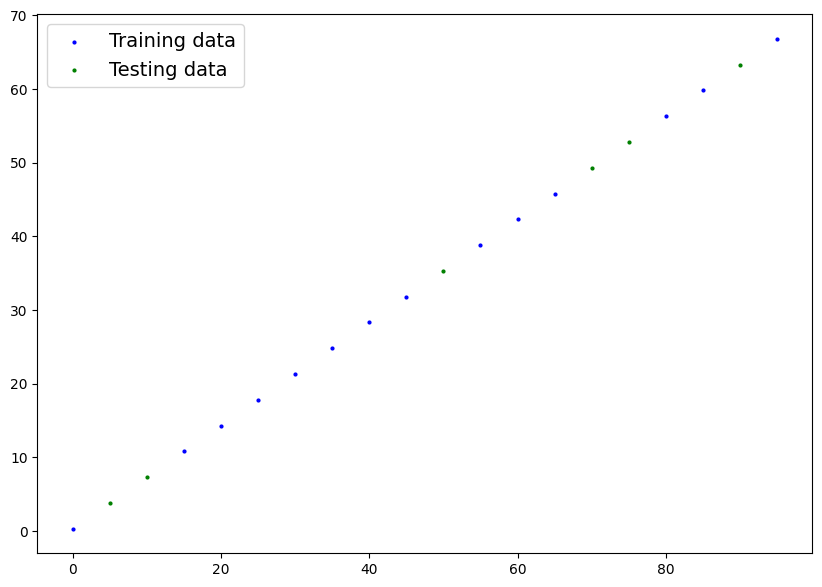

In [8]:
def plot_prediction(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predictions=None):
   plt.figure(figsize=(10,7))
   plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
   plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

   if predictions is not None:
       plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

   plt.legend(prop={"size": 14});

plot_prediction()

In [10]:
model = LinearRegression()
model.eval()
with torch.inference_mode():
    y_preds = model(x_test)


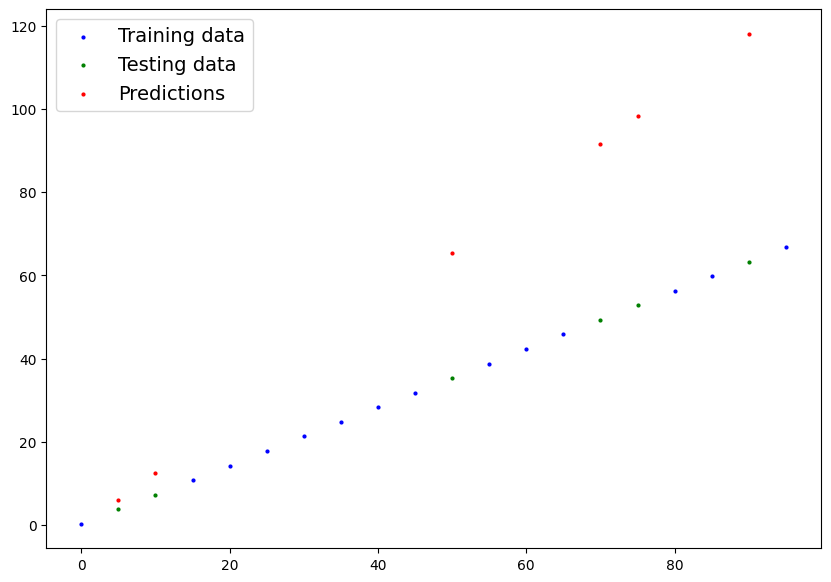

In [13]:
plot_prediction(x_train, y_train, x_test, y_test, y_preds)#before training 


In [39]:
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), # parameters of target model to optimize
                            lr=0.0001)

In [40]:
torch.manual_seed(42)
epochs = 100 

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model.train()
    y_pred = model(x_train)
    loss = loss_function(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()

    with torch.inference_mode():
        test_pred = model(x_test)
        test_loss = loss_function(test_pred, y_test.type(torch.float)) 

        if epoch % 10 == 0:
                epoch_count.append(epoch)
                train_loss_values.append(loss.detach().numpy())
                test_loss_values.append(test_loss.detach().numpy())
                print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 1.1522434949874878 | MAE Test Loss: 1.0000863075256348 
Epoch: 10 | MAE Train Loss: 0.14717283844947815 | MAE Test Loss: 0.063865065574646 
Epoch: 20 | MAE Train Loss: 0.153193399310112 | MAE Test Loss: 0.0565410852432251 
Epoch: 30 | MAE Train Loss: 0.17777200043201447 | MAE Test Loss: 0.046225231140851974 
Epoch: 40 | MAE Train Loss: 0.12674792110919952 | MAE Test Loss: 0.08835113048553467 
Epoch: 50 | MAE Train Loss: 0.1327677220106125 | MAE Test Loss: 0.08102965354919434 
Epoch: 60 | MAE Train Loss: 0.16865430772304535 | MAE Test Loss: 0.05229266360402107 
Epoch: 70 | MAE Train Loss: 0.17510899901390076 | MAE Test Loss: 0.047177355736494064 
Epoch: 80 | MAE Train Loss: 0.12418627738952637 | MAE Test Loss: 0.09121695905923843 
Epoch: 90 | MAE Train Loss: 0.1302061527967453 | MAE Test Loss: 0.08389560133218765 


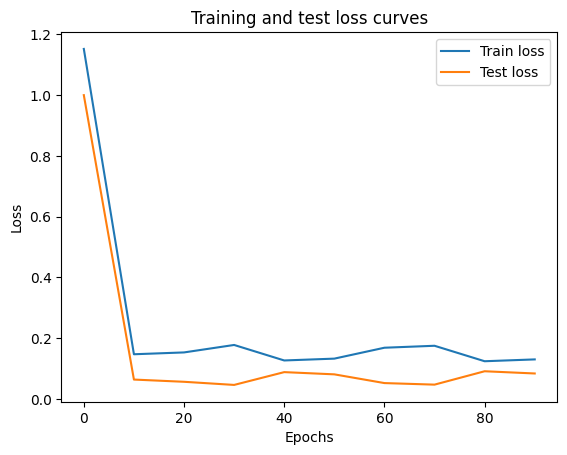

In [41]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

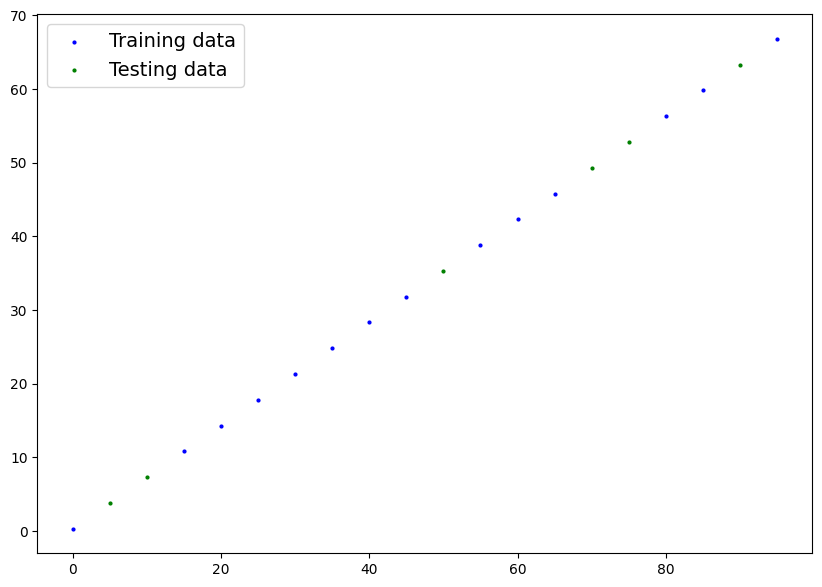

In [42]:
plot_prediction()